# Importing Packages and Collecting Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
tweets = pd.read_csv('/content/drive/My Drive/Tweets - Tweets.csv')

In [0]:
tweets.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [0]:
'''Variable Description'''
def description(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

description(tweets)

Dataset Shape: (14640, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,tweet_id,float64,0,14484,5.70306e+17,5.70301e+17,5.70301e+17
1,airline,object,0,6,Virgin America,Virgin America,Virgin America
2,name,object,0,7701,cairdin,jnardino,yvonnalynn
3,retweet_count,int64,0,18,0,0,0
4,text,object,0,14427,@VirginAmerica What @dhepburn said.,@VirginAmerica plus you've added commercials t...,@VirginAmerica I didn't today... Must mean I n...
5,tweet_coord,object,13621,832,NaN,NaN,NaN
6,tweet_created,object,0,14247,2015-02-24 11:35:52 -0800,2015-02-24 11:15:59 -0800,2015-02-24 11:15:48 -0800
7,tweet_location,object,4733,3022,NaN,NaN,Lets Play
8,user_timezone,object,4820,85,Eastern Time (US & Canada),Pacific Time (US & Canada),Central Time (US & Canada)


In [0]:
# Droping the unwanted variables
tweets.drop(columns=['tweet_id','name', 'retweet_count', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'], inplace=True)
tweets.head()

,airline,text
0,Virgin America,@VirginAmerica What @dhepburn said.
1,Virgin America,@VirginAmerica plus you've added commercials t...
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,@VirginAmerica it's really aggressive to blast...
4,Virgin America,@VirginAmerica and it's a really big bad thing...


In [0]:
# Checking the blacks
blanks = []
for i, a, t in tweets.itertuples():
  if type(t) == str:
    if t.isspace():
      blanks.append(i)

In [0]:
blanks

[]

# NLTK-VADER
VADER or Valence Aware Dictionary and Sentiment Reasoner is a rule/lexicon-based, open-source sentiment analyzer pre-built library, protected under the MIT license. To use the library, follow the below mentioned steps:

VADER scoring methodology: https://github.com/cjhutto/vaderSentiment#about-the-scoring

#### <font color="green">Why VADER? </font>
VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

#### <font color="green">Advantages of using VADER</font>
VADER has a lot of advantages over traditional methods of Sentiment Analysis, including:
* It works exceedingly well on social media type text, yet readily generalizes to multiple domains
* It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
* It is fast enough to be used online with streaming data, and
* It does not severely suffer from a speed-performance tradeoff.

In [0]:
# Import the package and download NLTK wrapper for VADER library
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
# applying Sentiment Intensity Analyzer whole text column
tweets['scores'] = tweets['text'].apply(lambda text: sid.polarity_scores(text))
tweets.head()

,airline,text,scores
0,Virgin America,@VirginAmerica What @dhepburn said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Virgin America,@VirginAmerica plus you've added commercials t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Virgin America,@VirginAmerica it's really aggressive to blast...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp..."
4,Virgin America,@VirginAmerica and it's a really big bad thing...,"{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp..."


In [0]:
# collecting compound scores
tweets['compound'] = tweets['scores'].apply(lambda d:d['compound'])
tweets.head()

,airline,text,scores,compound
0,Virgin America,@VirginAmerica What @dhepburn said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Virgin America,@VirginAmerica plus you've added commercials t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Virgin America,@VirginAmerica it's really aggressive to blast...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",-0.5984
4,Virgin America,@VirginAmerica and it's a really big bad thing...,"{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp...",-0.5829


In [0]:
# Getting Positive, Negative and Neutral scores based on compound scores
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

tweets['sentiment'] = tweets['compound'].apply(lambda scores: 'positive' if scores > 0.05 else 'neutral' if scores>-0.05 and 0.05 else 'negative')

In [0]:
tweets

,airline,text,scores,compound,sentiment
0,Virgin America,@VirginAmerica What @dhepburn said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,Virgin America,@VirginAmerica plus you've added commercials t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,Virgin America,@VirginAmerica it's really aggressive to blast...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",-0.5984,negative
4,Virgin America,@VirginAmerica and it's a really big bad thing...,"{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp...",-0.5829,negative
...,...,...,...,...,...
14635,American,@AmericanAir thank you we got on a different f...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.3612,positive
14636,American,@AmericanAir leaving over 20 minutes Late Flig...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7906,negative
14637,American,@AmericanAir Please bring American Airlines to...,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.3182,positive
14638,American,"@AmericanAir you have my money, you change my ...","{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.5027,positive


# EDA

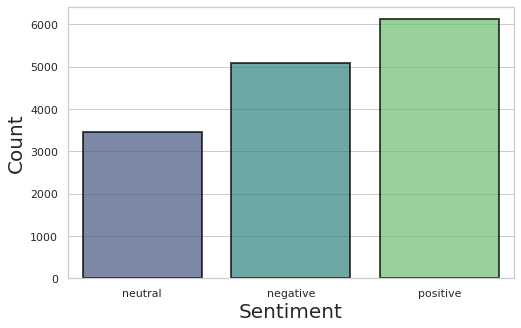

In [0]:
# Sentiment Count
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data = tweets, x ='sentiment', palette = 'viridis', alpha = 0.7, linewidth=2, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Sentiment', fontsize = 20)
plt.show()

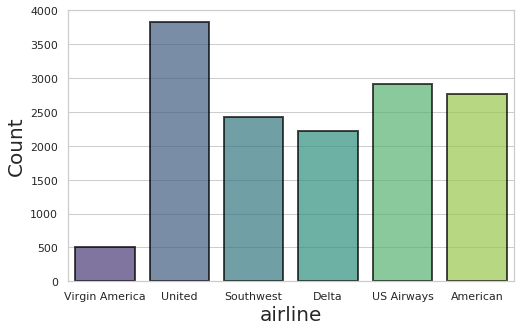

In [0]:
# Airline count
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data = tweets, x ='airline', palette = 'viridis', alpha = 0.7, linewidth=2, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('airline', fontsize = 20)
plt.show()

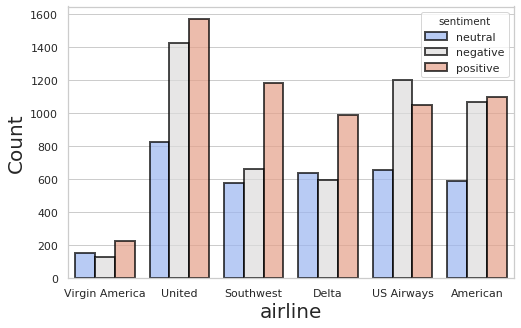

In [0]:
# Sentiment count by airline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data = tweets, hue ='sentiment', x ='airline',palette = 'coolwarm', alpha = 0.7, linewidth=2, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('airline', fontsize = 20)
plt.show()